# Fully-Connected Neural Nets
I have implemented a fully-connected two-layer neural network on CIFAR-10. The implementation was done using a more modular design so that we can implement different layer types in isolation and then snap them together into models with different architectures.

For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.

In addition to implementing fully-connected networks of arbitrary depth, I explored different update rules for optimization, and introduced Batch Normalization as a tool to more efficiently optimize deep networks.
  

In [5]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from AI.classifiers.fc_net import *
from AI.data_utils import get_CIFAR10_data
from AI.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

# Loading of pre-processed Data

Preprocessing has been done in AI/data_utils.py

In [8]:
# Load the (preprocessed) CIFAR10 data.
data = get_CIFAR10_data()
for k, v in data.items():
    print('%s: ' % k, v.shape)

X_train:  (48000, 3, 32, 32)
y_train:  (48000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


In [24]:
X = data['X_train'];
print(X[1][1][:][:])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Visualizing some data from the dataset

(50000, 32, 32, 3) (50000,)


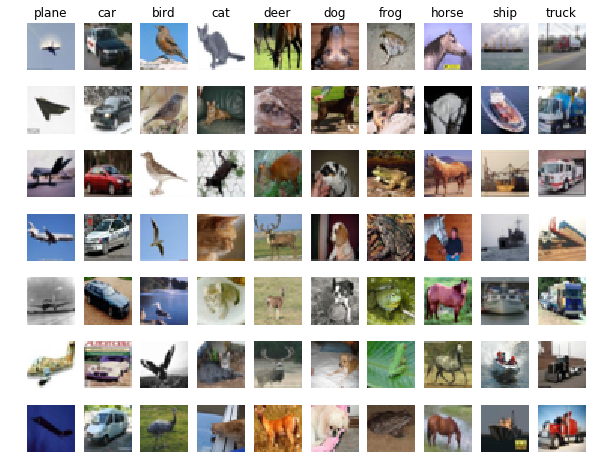

In [36]:
from AI.data_utils import load_CIFAR10
# Load the raw CIFAR-10 data
cifar10_dir = 'datasets/'
X, y = load_CIFAR10(cifar10_dir)
print(X.shape, y.shape)

#A few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y_hat, cls in enumerate(classes):
    idxs = np.flatnonzero(y == y_hat)  # returns the indices of nonzero elements
    idxs = np.random.choice(idxs, samples_per_class, replace=False)  #choosing 7 samples from the current cls
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y_hat + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Affine layer: foward
Open the file `dl4cv/layers.py` and have a look at the `affine_forward` function. It is defined there is to make this main file a bit clean


# Affine layer: backward
Now have a look at `affine_backward` function. This will be used for back propagation between the layers

# ReLU layer: forward
Implementation of the forward pass for the ReLU activation function is in in the `relu_forward` function.

# ReLU layer: backward
As I have used ReLU activation function, its backward pass had to implemented. It has been done in the `relu_backward` function.

# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, I have defined these as `affine_relu_forward` and `affine_relu_backward` functions.

# Loss layers: Softmax
The softmax function has been defined in the end which will be used after the final layer


# Two-layer network
I was trying to test two-layer network before going for more layers. Please open the file `dl4cv/classifiers/fc_net.py` and have a look at the implementation of the `TwoLayerNet` class. This class will serve as a model for the other networks which have been implemented afterwards 

# Solver
For better readabilty of the code and following a more modular design, for this assignment, I have logic for training models into a separate class.

Open the file `dl4cv/solver.py` and have a look at it I have used use a `Solver` instance to train a `TwoLayerNet`

In [15]:
model = TwoLayerNet(hidden_dim=150, reg=1e-3, weight_scale=1e-3)
solver = None

mod_data ={}
mod_data['X_train'] = data['X_train'] 
mod_data['X_val'] = data['X_val']
mod_data['y_train'] = data['y_train']
mod_data['y_val'] = data['y_val']
        
solver = Solver(model, mod_data)
solver.train()



(Iteration 1 / 4800) loss: 2.299785
(Epoch 0 / 10) train acc: 0.177000; val_acc: 0.157000
(Iteration 11 / 4800) loss: 2.180313
(Iteration 21 / 4800) loss: 2.064246
(Iteration 31 / 4800) loss: 1.977040
(Iteration 41 / 4800) loss: 1.862473
(Iteration 51 / 4800) loss: 2.047418
(Iteration 61 / 4800) loss: 1.937043
(Iteration 71 / 4800) loss: 1.789345
(Iteration 81 / 4800) loss: 1.872693
(Iteration 91 / 4800) loss: 1.666587
(Iteration 101 / 4800) loss: 1.875128
(Iteration 111 / 4800) loss: 1.749628
(Iteration 121 / 4800) loss: 1.772629
(Iteration 131 / 4800) loss: 1.683838
(Iteration 141 / 4800) loss: 1.640355
(Iteration 151 / 4800) loss: 1.698575
(Iteration 161 / 4800) loss: 1.917946
(Iteration 171 / 4800) loss: 1.512078
(Iteration 181 / 4800) loss: 1.555638
(Iteration 191 / 4800) loss: 1.508129
(Iteration 201 / 4800) loss: 1.524634
(Iteration 211 / 4800) loss: 1.613186


KeyboardInterrupt: 

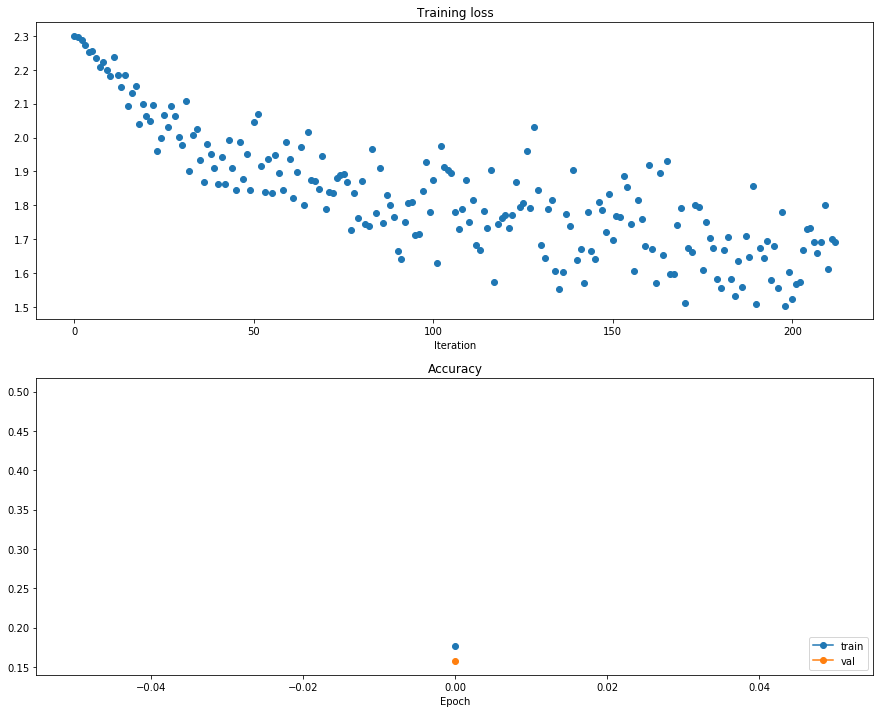

In [16]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network
Since the two layer network worded, I then implemented a fully-connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `dl4cv/classifiers/fc_net.py`.

Look at the the initialization, the forward pass, and the backward pass. 

## Sanity Check

As a sanity check, I tried to overfit a small dataset of 50 images on a three-layer network with 100 units in each hidden layer. Since I found that stochastic gradient descent parameter update is not effective as others, I implemented a few other and eventually stuck with 'sgd_momentum'

(Iteration 1 / 40) loss: 2.234329
(Epoch 0 / 20) train acc: 0.360000; val_acc: 0.119000
(Epoch 1 / 20) train acc: 0.360000; val_acc: 0.120000
(Epoch 2 / 20) train acc: 0.340000; val_acc: 0.123000
(Epoch 3 / 20) train acc: 0.560000; val_acc: 0.137000
(Epoch 4 / 20) train acc: 0.420000; val_acc: 0.130000
(Epoch 5 / 20) train acc: 0.800000; val_acc: 0.144000
(Iteration 11 / 40) loss: 1.062475
(Epoch 6 / 20) train acc: 0.840000; val_acc: 0.154000
(Epoch 7 / 20) train acc: 0.640000; val_acc: 0.133000
(Epoch 8 / 20) train acc: 0.840000; val_acc: 0.130000
(Epoch 9 / 20) train acc: 0.840000; val_acc: 0.150000
(Epoch 10 / 20) train acc: 0.940000; val_acc: 0.155000
(Iteration 21 / 40) loss: 0.372841
(Epoch 11 / 20) train acc: 0.940000; val_acc: 0.162000
(Epoch 12 / 20) train acc: 0.940000; val_acc: 0.165000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.161000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.157000
(Epoch 15 / 20) train acc: 0.980000; val_acc: 0.159000
(Iteration 31 / 40) loss: 

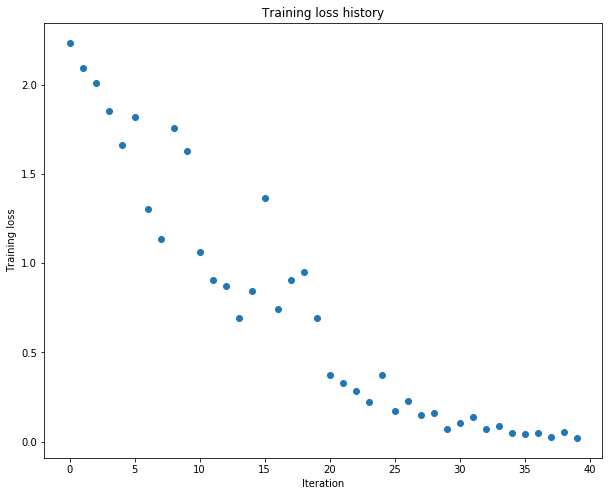

In [17]:
# Three-layer network means 2 hidden layers

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1e-2   
learning_rate = 1e-2  
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# Update rules
I have shown the comparison between different update rules on a five layer net, each layer having 500 units

In [18]:
num_train = 4000
small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum', 'adam']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

    solver = Solver(model, small_data,
                    num_epochs=10, batch_size=100,
                    update_rule=update_rule,
                    optim_config={'learning_rate': 1e-3},
                    verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
  
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

running with  sgd
(Iteration 1 / 400) loss: 2.835306
(Epoch 0 / 10) train acc: 0.131000; val_acc: 0.139000
(Iteration 11 / 400) loss: 2.473235
(Iteration 21 / 400) loss: 2.443415
(Iteration 31 / 400) loss: 2.258469
(Epoch 1 / 10) train acc: 0.144000; val_acc: 0.150000
(Iteration 41 / 400) loss: 2.244924
(Iteration 51 / 400) loss: 2.354279
(Iteration 61 / 400) loss: 2.199589
(Iteration 71 / 400) loss: 2.215861
(Epoch 2 / 10) train acc: 0.204000; val_acc: 0.180000
(Iteration 81 / 400) loss: 2.235298
(Iteration 91 / 400) loss: 2.189722
(Iteration 101 / 400) loss: 2.220576
(Iteration 111 / 400) loss: 2.195624
(Epoch 3 / 10) train acc: 0.197000; val_acc: 0.197000
(Iteration 121 / 400) loss: 2.137654
(Iteration 131 / 400) loss: 2.042280


KeyboardInterrupt: 

# Adam
Adam [1] is an update rule that sets per-parameter learning rates by using a running average of the second moments of gradients.

[1] Diederik Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", ICLR 2015.

running with  adam
(Iteration 1 / 400) loss: 2.910430
(Epoch 0 / 10) train acc: 0.140000; val_acc: 0.123000
(Iteration 11 / 400) loss: 2.113919
(Iteration 21 / 400) loss: 1.848431
(Iteration 31 / 400) loss: 1.759017
(Epoch 1 / 10) train acc: 0.385000; val_acc: 0.325000
(Iteration 41 / 400) loss: 1.655392
(Iteration 51 / 400) loss: 1.710684
(Iteration 61 / 400) loss: 1.484428
(Iteration 71 / 400) loss: 1.541932
(Epoch 2 / 10) train acc: 0.428000; val_acc: 0.324000
(Iteration 81 / 400) loss: 1.415365
(Iteration 91 / 400) loss: 1.523965
(Iteration 101 / 400) loss: 1.416669
(Iteration 111 / 400) loss: 1.470383
(Epoch 3 / 10) train acc: 0.523000; val_acc: 0.350000
(Iteration 121 / 400) loss: 1.382050
(Iteration 131 / 400) loss: 1.423590
(Iteration 141 / 400) loss: 1.404152
(Iteration 151 / 400) loss: 1.329954
(Epoch 4 / 10) train acc: 0.528000; val_acc: 0.365000
(Iteration 161 / 400) loss: 1.218970
(Iteration 171 / 400) loss: 1.348785
(Iteration 181 / 400) loss: 1.322875
(Iteration 191 / 40

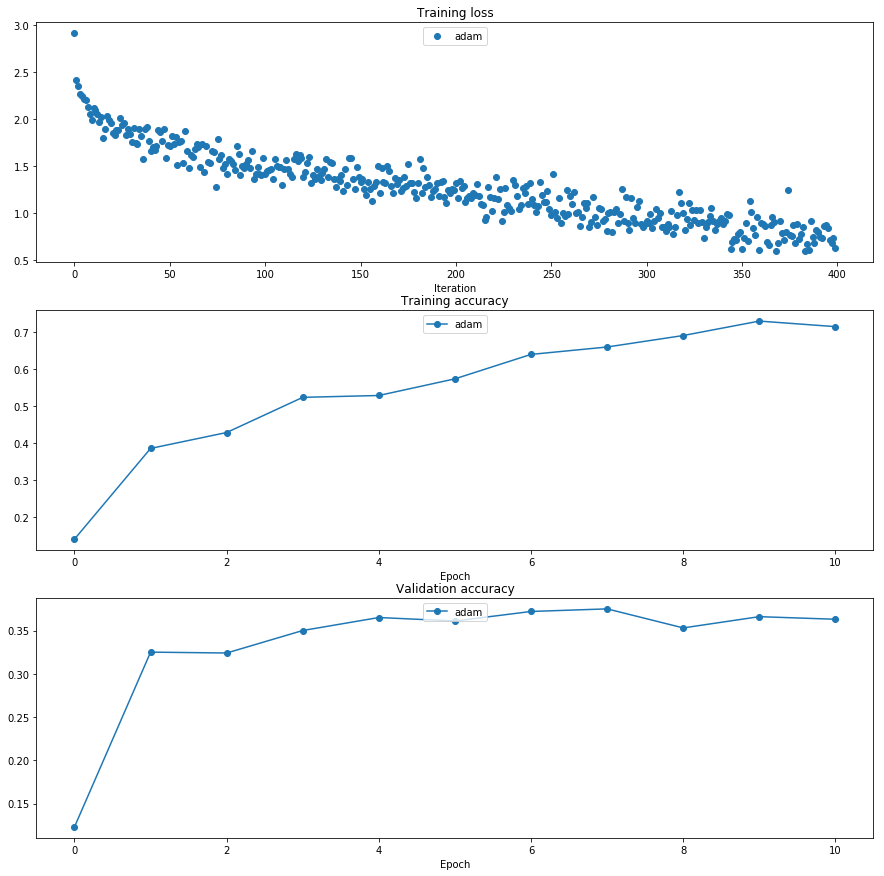

In [19]:
num_train = 4000
learning_rates = {'adam': 1e-3}  
update_rule = 'adam'
print('running with ', update_rule)
model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)  #it was 5e-2 originally
solvers = {}
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
solver = Solver(model, small_data,
              num_epochs=10, batch_size=100,
              update_rule=update_rule,
              optim_config={
                'learning_rate': learning_rates[update_rule]
              },
              verbose=True)
solvers[update_rule] = solver
solver.train()
print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.items():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
  
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
    
plt.gcf().set_size_inches(15, 15)
plt.show()

# Train a good model on full data


In [46]:
solvers = {}
learning_rates = {'adam': 1e-3}   
update_rule = 'adam'
print('running with ', update_rule)
best_model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)  #it was 5e-2 originally
big_data = {
  'X_train': data['X_train'],
  'y_train': data['y_train'],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
solver = Solver(best_model, big_data,
              num_epochs=20, batch_size=100,
              update_rule=update_rule,
              optim_config={
                'learning_rate': learning_rates[update_rule]
              },
              verbose=True)
solvers[update_rule] = solver
solver.train()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

running with  adam
(Iteration 1 / 9600) loss: 2.412764
(Epoch 0 / 20) train acc: 0.164000; val_acc: 0.154000
(Iteration 11 / 9600) loss: 2.152033
(Iteration 21 / 9600) loss: 1.986593
(Iteration 31 / 9600) loss: 1.991700
(Iteration 41 / 9600) loss: 1.700089
(Iteration 51 / 9600) loss: 1.972668
(Iteration 61 / 9600) loss: 1.883241
(Iteration 71 / 9600) loss: 1.747153
(Iteration 81 / 9600) loss: 1.777678
(Iteration 91 / 9600) loss: 1.900189
(Iteration 101 / 9600) loss: 1.751406
(Iteration 111 / 9600) loss: 1.831486
(Iteration 121 / 9600) loss: 1.698529
(Iteration 131 / 9600) loss: 1.509674
(Iteration 141 / 9600) loss: 1.850633
(Iteration 151 / 9600) loss: 1.681533
(Iteration 161 / 9600) loss: 1.715362
(Iteration 171 / 9600) loss: 1.727297
(Iteration 181 / 9600) loss: 1.582442
(Iteration 191 / 9600) loss: 1.758632
(Iteration 201 / 9600) loss: 1.483286
(Iteration 211 / 9600) loss: 1.940734
(Iteration 221 / 9600) loss: 1.759393
(Iteration 231 / 9600) loss: 1.661081
(Iteration 241 / 9600) los

(Iteration 2061 / 9600) loss: 1.238425
(Iteration 2071 / 9600) loss: 1.354127
(Iteration 2081 / 9600) loss: 1.202469
(Iteration 2091 / 9600) loss: 1.171788
(Iteration 2101 / 9600) loss: 1.484513
(Iteration 2111 / 9600) loss: 1.161584
(Iteration 2121 / 9600) loss: 1.591321
(Iteration 2131 / 9600) loss: 1.320283
(Iteration 2141 / 9600) loss: 1.247430
(Iteration 2151 / 9600) loss: 1.304535
(Iteration 2161 / 9600) loss: 1.487115
(Iteration 2171 / 9600) loss: 1.223695
(Iteration 2181 / 9600) loss: 1.219442
(Iteration 2191 / 9600) loss: 1.358693
(Iteration 2201 / 9600) loss: 1.301588
(Iteration 2211 / 9600) loss: 1.196828
(Iteration 2221 / 9600) loss: 1.537364
(Iteration 2231 / 9600) loss: 1.307504
(Iteration 2241 / 9600) loss: 1.234103
(Iteration 2251 / 9600) loss: 1.352488
(Iteration 2261 / 9600) loss: 1.365404
(Iteration 2271 / 9600) loss: 1.246891
(Iteration 2281 / 9600) loss: 1.292276
(Iteration 2291 / 9600) loss: 1.316528
(Iteration 2301 / 9600) loss: 1.267627
(Iteration 2311 / 9600) l

(Iteration 4111 / 9600) loss: 1.049550
(Iteration 4121 / 9600) loss: 1.061651
(Iteration 4131 / 9600) loss: 1.007469
(Iteration 4141 / 9600) loss: 1.199979
(Iteration 4151 / 9600) loss: 1.203395
(Iteration 4161 / 9600) loss: 1.208121
(Iteration 4171 / 9600) loss: 1.075183
(Iteration 4181 / 9600) loss: 1.116589
(Iteration 4191 / 9600) loss: 1.251763
(Iteration 4201 / 9600) loss: 0.951149
(Iteration 4211 / 9600) loss: 0.984391
(Iteration 4221 / 9600) loss: 1.275757
(Iteration 4231 / 9600) loss: 1.003355
(Iteration 4241 / 9600) loss: 1.030894
(Iteration 4251 / 9600) loss: 1.079977
(Iteration 4261 / 9600) loss: 1.214703
(Iteration 4271 / 9600) loss: 1.307240
(Iteration 4281 / 9600) loss: 1.246773
(Iteration 4291 / 9600) loss: 1.204540
(Iteration 4301 / 9600) loss: 1.354126
(Iteration 4311 / 9600) loss: 0.920922
(Epoch 9 / 20) train acc: 0.586000; val_acc: 0.513000
(Iteration 4321 / 9600) loss: 1.232931
(Iteration 4331 / 9600) loss: 1.109649
(Iteration 4341 / 9600) loss: 1.300917
(Iteration

(Iteration 6161 / 9600) loss: 1.129855
(Iteration 6171 / 9600) loss: 1.017905
(Iteration 6181 / 9600) loss: 0.975518
(Iteration 6191 / 9600) loss: 1.132376
(Iteration 6201 / 9600) loss: 0.802567
(Iteration 6211 / 9600) loss: 0.821070
(Iteration 6221 / 9600) loss: 0.717293
(Iteration 6231 / 9600) loss: 0.975989
(Epoch 13 / 20) train acc: 0.646000; val_acc: 0.497000
(Iteration 6241 / 9600) loss: 1.071640
(Iteration 6251 / 9600) loss: 0.895763
(Iteration 6261 / 9600) loss: 0.999399
(Iteration 6271 / 9600) loss: 0.998285
(Iteration 6281 / 9600) loss: 1.138172
(Iteration 6291 / 9600) loss: 0.970143
(Iteration 6301 / 9600) loss: 0.915233
(Iteration 6311 / 9600) loss: 0.989484
(Iteration 6321 / 9600) loss: 0.888095
(Iteration 6331 / 9600) loss: 1.325965
(Iteration 6341 / 9600) loss: 1.014583
(Iteration 6351 / 9600) loss: 0.823701
(Iteration 6361 / 9600) loss: 1.051793
(Iteration 6371 / 9600) loss: 1.061850
(Iteration 6381 / 9600) loss: 1.093302
(Iteration 6391 / 9600) loss: 1.042854
(Iteratio

(Iteration 8201 / 9600) loss: 1.019105
(Iteration 8211 / 9600) loss: 0.777709
(Iteration 8221 / 9600) loss: 0.903487
(Iteration 8231 / 9600) loss: 1.033046
(Iteration 8241 / 9600) loss: 1.169090
(Iteration 8251 / 9600) loss: 0.829939
(Iteration 8261 / 9600) loss: 1.052403
(Iteration 8271 / 9600) loss: 0.754322
(Iteration 8281 / 9600) loss: 1.118821
(Iteration 8291 / 9600) loss: 0.957737
(Iteration 8301 / 9600) loss: 0.897804
(Iteration 8311 / 9600) loss: 0.923454
(Iteration 8321 / 9600) loss: 1.032071
(Iteration 8331 / 9600) loss: 0.711722
(Iteration 8341 / 9600) loss: 0.870917
(Iteration 8351 / 9600) loss: 0.982025
(Iteration 8361 / 9600) loss: 0.967456
(Iteration 8371 / 9600) loss: 0.922156
(Iteration 8381 / 9600) loss: 1.009262
(Iteration 8391 / 9600) loss: 0.914614
(Iteration 8401 / 9600) loss: 0.902107
(Iteration 8411 / 9600) loss: 0.945298
(Iteration 8421 / 9600) loss: 0.918860
(Iteration 8431 / 9600) loss: 0.932901
(Iteration 8441 / 9600) loss: 0.828812
(Iteration 8451 / 9600) l

# Test my model on validation set
Run your best model on the validation and test sets. You should achieve above 48% accuracy on the validation set.

In [47]:
X_test = data['X_test']
X_val = data['X_val']
y_val = data['y_val']
y_test = data['y_test']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print('Validation set accuracy: ', (y_val_pred == y_val).mean())
print('Test set accuracy: ', (y_test_pred == y_test).mean())

Validation set accuracy:  0.517
Test set accuracy:  0.512


# Adding a little Noise to validation and test dataset

In [72]:
size = X_val.shape
X_val = X_val + np.random.random_integers(0,50,[*size])
X_val =  np.clip(X_val,0,255)
size = X_test.shape
X_test = X_test + np.random.random_integers(0,50,[*size])
X_test = np.clip(X_test,0,255)


# Displaying the Images

This is to show how images look by adding some normally distributed noise

(50000, 32, 32, 3) (50000,)


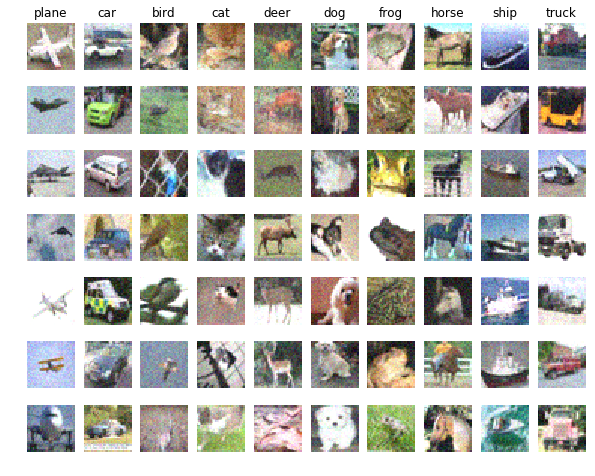

In [73]:
X, y = load_CIFAR10(cifar10_dir)
print(X.shape, y.shape)

size = X.shape
X = X + np.random.random_integers(0,50,[*size])
X = np.clip(X,0,255)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y_hat, cls in enumerate(classes):
    idxs = np.flatnonzero(y == y_hat)  # returns the indices of nonzero elements
    idxs = np.random.choice(idxs, samples_per_class, replace=False)  #choosing 7 samples from the current cls
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y_hat + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Testing the Classifer after Noise addition

The accuracy

In [74]:
y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print('Validation set accuracy: ', (y_val_pred == y_val).mean())
print('Test set accuracy: ', (y_test_pred == y_test).mean())

Validation set accuracy:  0.184
Test set accuracy:  0.218


# It is clearly evident that adding a random noise can trick the deep learning algorithm

This is why computers don't really stand anywhere close to humans. The only thing they have is the storage to perform innumerable amount of computations. Even if we consider the amount of power required to run a super computer and a human brain, there is a huge difference